In [1]:
import sys
import os
top_path = os.path.abspath("../")
if top_path not in sys.path:
    sys.path.insert(0, top_path)

import astropy.units as u
from astropy.io import fits
import h5py
import matplotlib.pyplot as plt
plt.style.use('apw-notebook')
%matplotlib inline
import numpy as np
    
from gwb.data import TGASData

In [2]:
tgas = TGASData('../data/stacked_tgas.fits')
tgas = tgas[tgas.parallax_snr > 8]

In [3]:
# pair_idx = fits.getdata('../data/snr8_n32_dv4.fits', 0)
tbl = fits.getdata('../data/snr8_n64_dv8.fits', 1)
pair_idx = np.vstack((tbl['star1'],tbl['star2'])).T

In [4]:
# with h5py.File("../data/snr8_n32_dv4_vscatter1-lratio.h5") as f:
# with h5py.File("../data/snr8_n32_dv4") as f:
with h5py.File("../data/snr8_n64_dv8_vscatter0-lratio.h5") as f:
    llr = f['lnH1'][:] - f['lnH2'][:]

In [5]:
tgas1 = tgas[pair_idx[:,0]]
tgas2 = tgas[pair_idx[:,1]]

In [6]:
min_snr = np.min(np.vstack((tgas1.parallax_snr, tgas2.parallax_snr)), axis=0)

In [7]:
len(llr), len(tgas1), len(tgas2)

(892846, 892846, 892846)

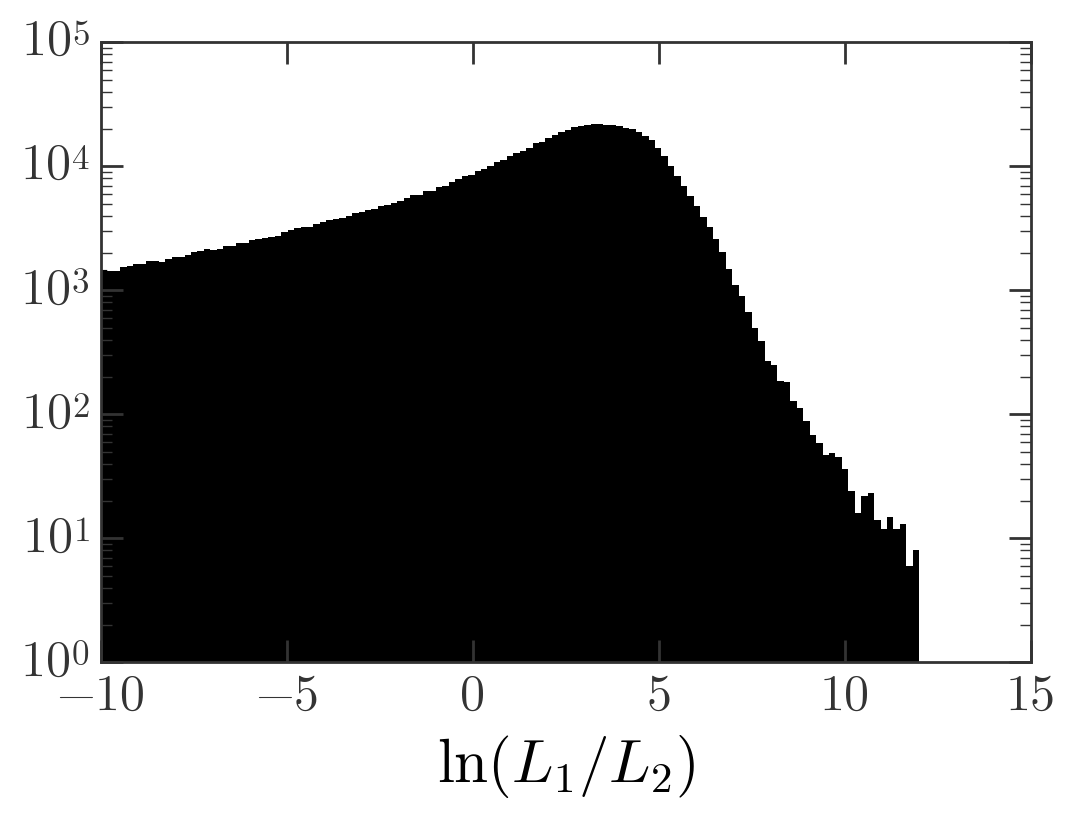

In [8]:
plt.hist(llr, bins=np.linspace(-10,12,128), color='k');
plt.yscale('log')
plt.xlabel(r'$\ln (L_1/L_2)$')

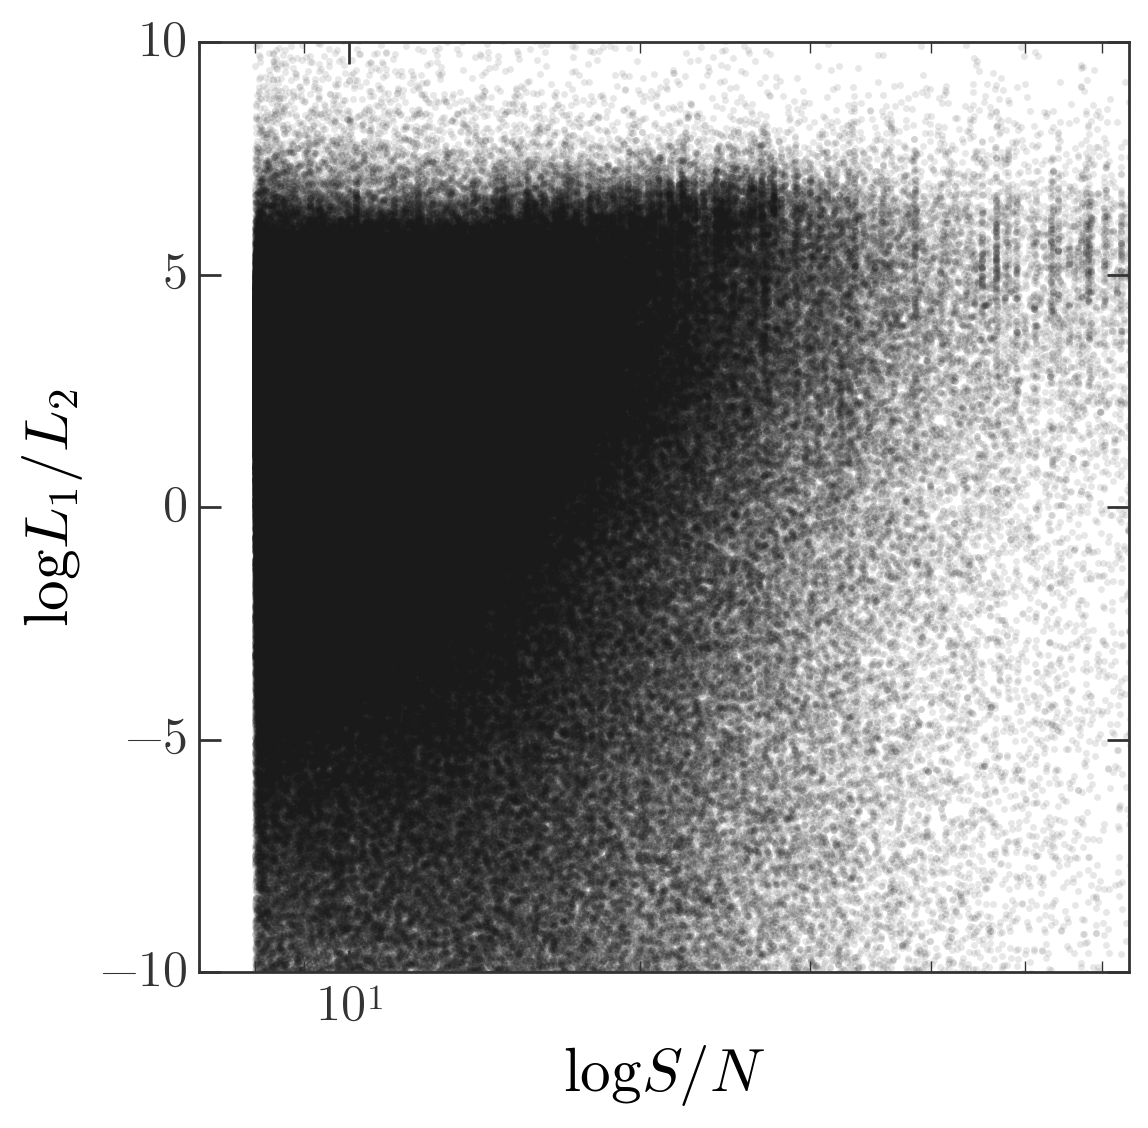

In [9]:
plt.figure(figsize=(6,6))
plt.semilogx(min_snr, llr, linestyle='none', alpha=0.1, marker='.')
plt.xlim(7, 64)
plt.ylim(-10, 10)
plt.xlabel(r'$\log S/N$')
plt.ylabel(r'$\log L_1/L_2$')

In [10]:
dvtan = np.sqrt(np.sum((tgas1.get_vtan() - tgas2.get_vtan())**2, axis=1))
dvtan.shape

(892846,)

In [11]:
c1 = tgas1.get_coord()
c2 = tgas2.get_coord()
sep = c1.separation_3d(c2)

In [12]:
# cut = llr < 6
cut_str = "min_snr**2 > 1024"
cut = eval(cut_str) # OMG

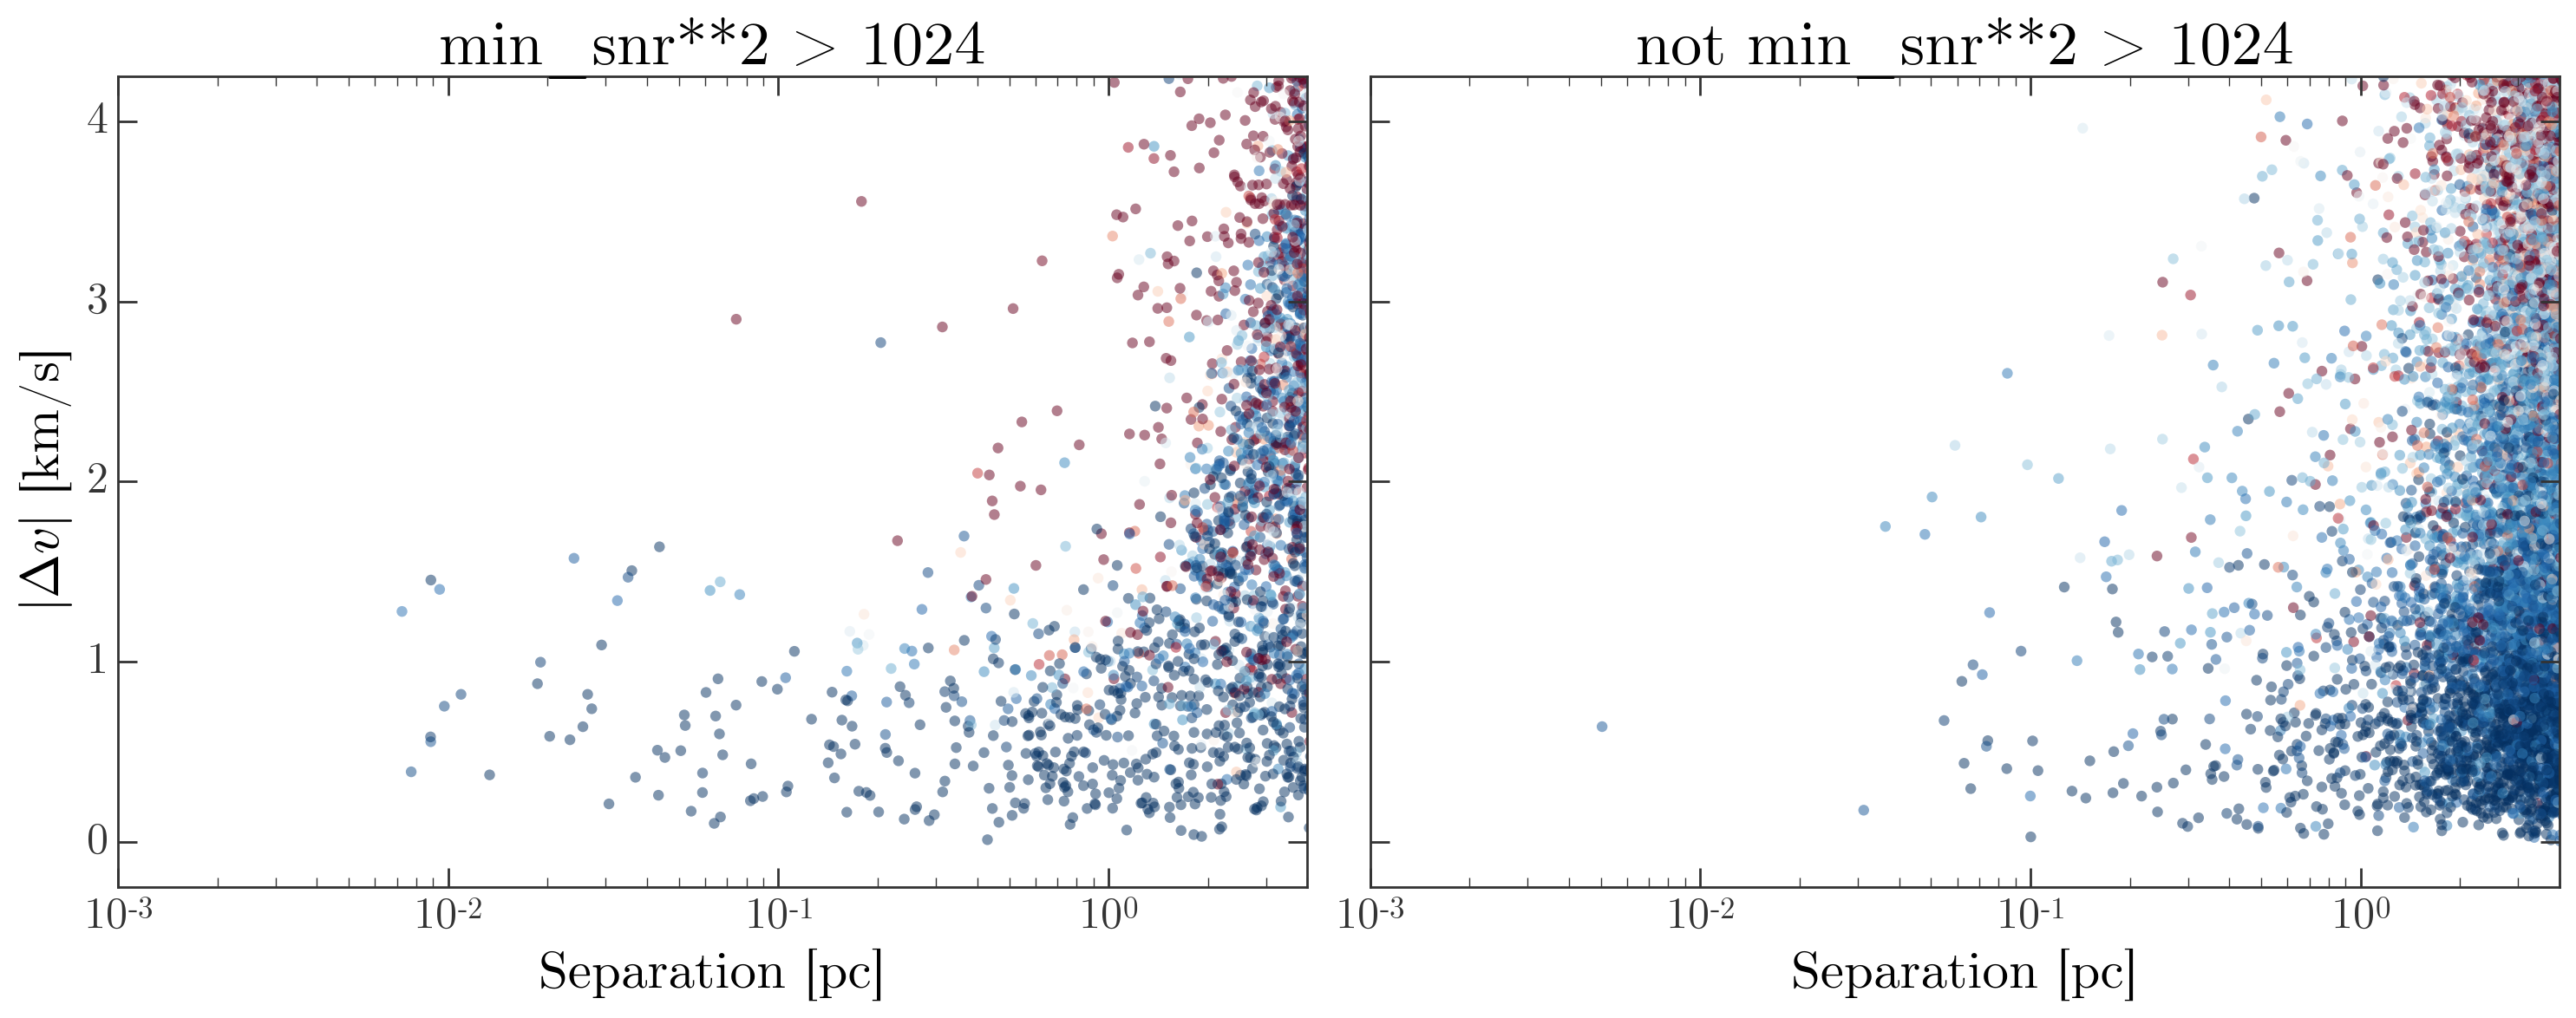

In [13]:
fig,axes = plt.subplots(1,2,figsize=(15,6), sharex=True, sharey=True)

style = dict(alpha=0.5, marker='o', 
             vmin=np.median(llr)-5, vmax=np.median(llr)+5, cmap='RdBu')

axes[0].scatter(sep.to(u.pc).value[cut], dvtan.to(u.km/u.s).value[cut], c=llr[cut],  **style)
axes[1].scatter(sep.to(u.pc).value[~cut], dvtan.to(u.km/u.s).value[~cut], c=llr[~cut], **style)

axes[0].set_xscale('log')
axes[0].set_xlim(1E-3, 4)
axes[0].set_ylim(-0.25, 4.25)
axes[0].set_xlabel('Separation [pc]')
axes[0].set_ylabel(r'$|\Delta v|$ [km/s]')
axes[0].set_title(cut_str)

axes[1].set_title('not {}'.format(cut_str))
axes[1].set_xscale('log')
axes[1].set_xlabel('Separation [pc]')
# plt.colorbar()

fig.tight_layout()

---

In [33]:
fuck = 9
snr_cut_str = "min_snr**2 > 1024"
llr_cut_str = "llr > {}".format(fuck)

In [34]:
from astropy.constants import G, M_sun
a = np.logspace(0, 6, 1024) * u.au
v = np.sqrt(G*2*M_sun / a).to(u.km/u.s)

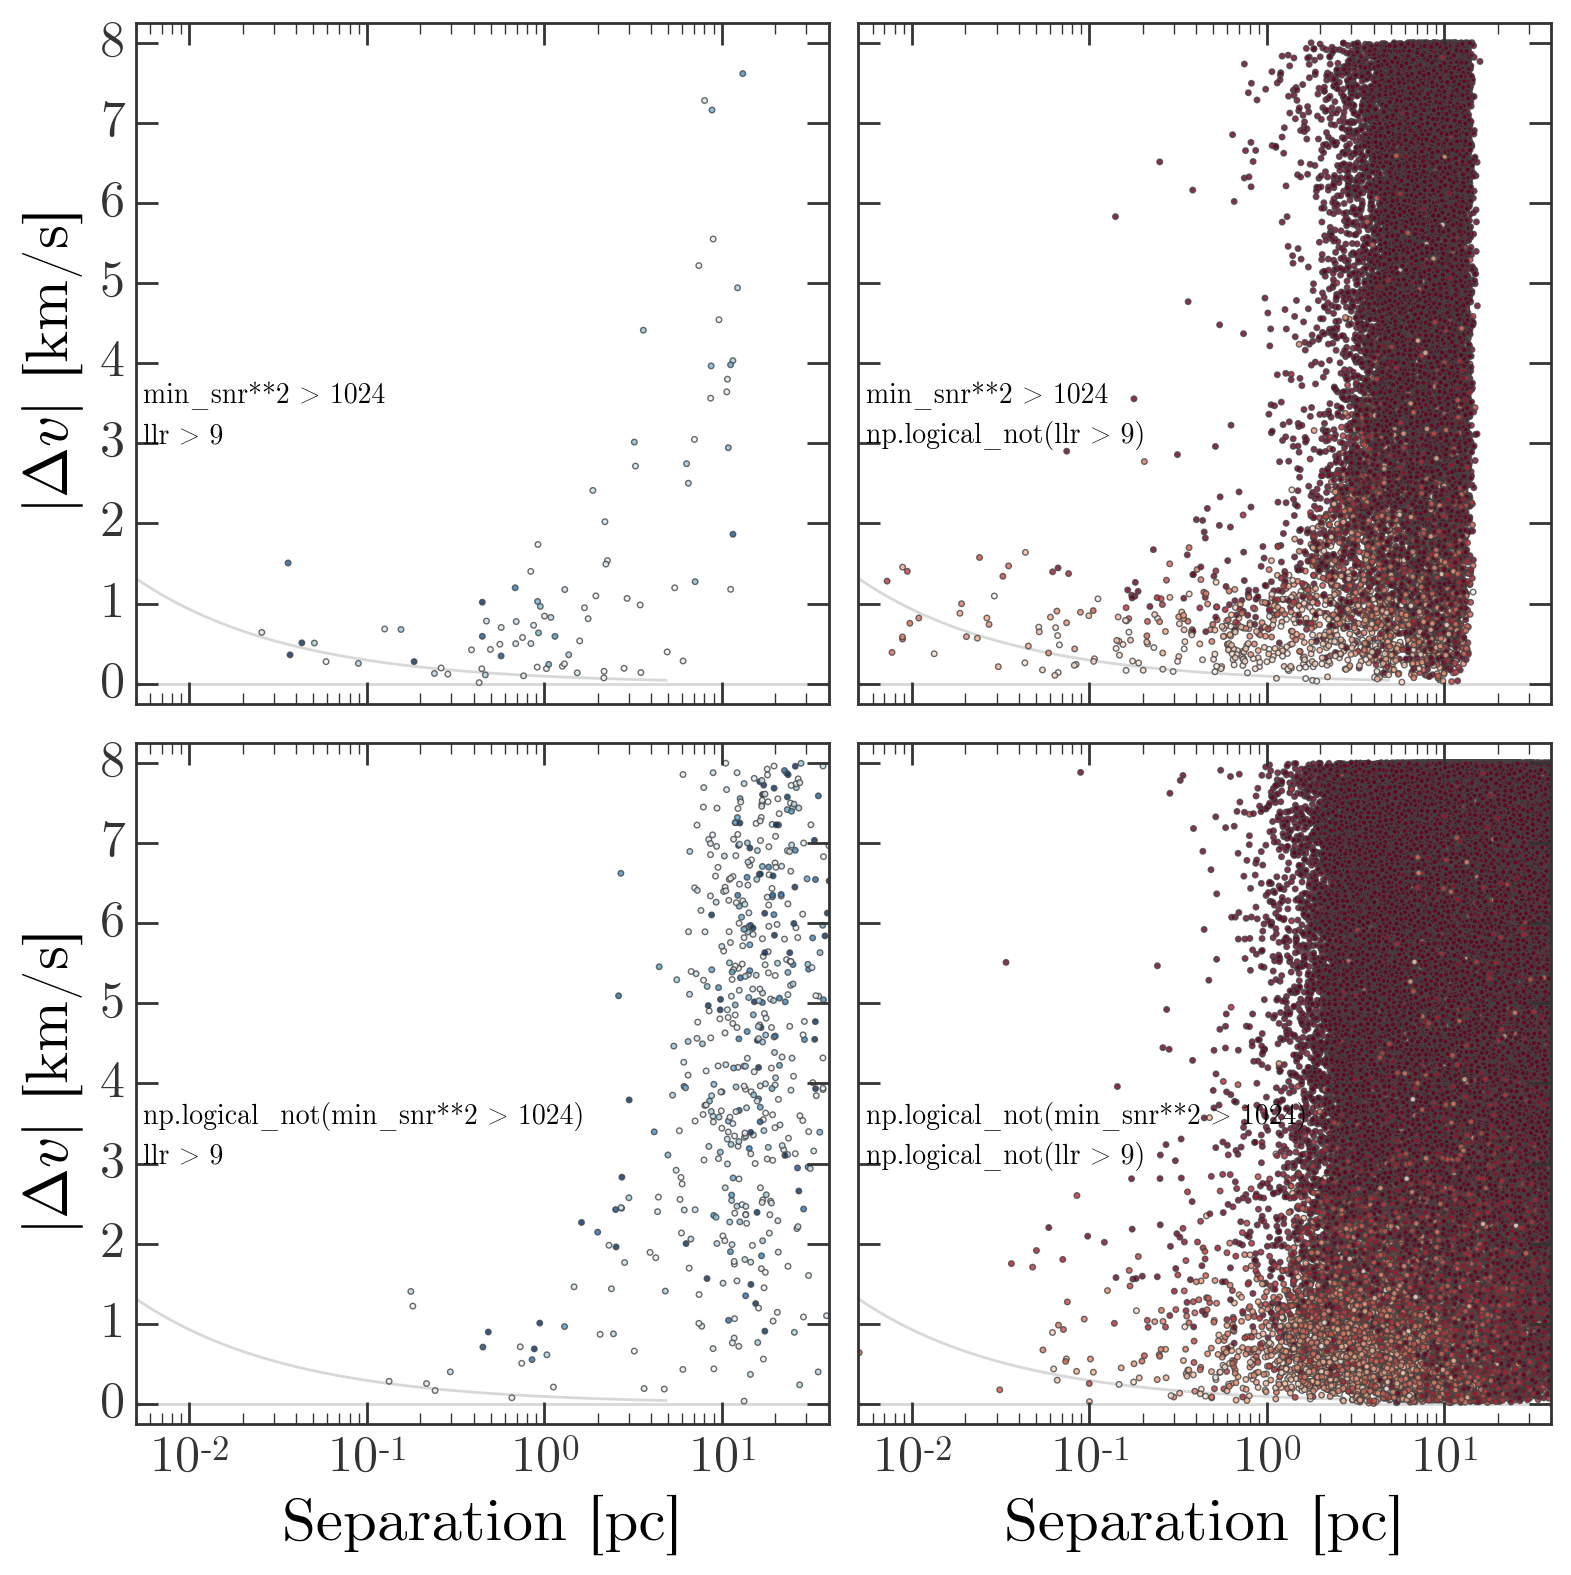

In [35]:
fig,axes = plt.subplots(2,2,figsize=(8,8), sharex=True, sharey=True)

style = dict(alpha=0.8, marker='o', s=4, linewidths=0.5, edgecolors='#444444',
             vmin=fuck-5, vmax=fuck+5, cmap='RdBu')

xmin = 5E-3
axes[0,0].set_xscale('log')
axes[0,0].set_xlim(xmin, 40)
axes[0,0].set_ylim(-0.25, 8.25)

for i,cut_str1 in enumerate([snr_cut_str, "np.logical_not({})".format(snr_cut_str)]):
    for j,cut_str2 in enumerate([llr_cut_str, "np.logical_not({})".format(llr_cut_str)]):
        cut = eval(cut_str1) & eval(cut_str2)
        axes[i,j].scatter(sep.to(u.pc).value[cut], dvtan.to(u.km/u.s).value[cut], c=llr[cut],  **style)
        axes[i,j].text(xmin+0.1*xmin, 3.5, cut_str1)
        axes[i,j].text(xmin+0.1*xmin, 3., cut_str2)
        
        axes[i,j].plot(a.to(u.pc).value, v, ls='-', marker='', 
                       color='#666666', alpha=0.25, zorder=-100, linewidth=1)
        axes[i,j].axhline(0., color='#666666', alpha=0.25, zorder=-100)

axes[1,0].set_xlabel('Separation [pc]')
axes[1,1].set_xlabel('Separation [pc]')
axes[0,0].set_ylabel(r'$|\Delta v|$ [km/s]')
axes[1,0].set_ylabel(r'$|\Delta v|$ [km/s]')

fig.tight_layout()

In [21]:
vtan1 = np.sqrt(np.sum(tgas1.get_vtan()**2, axis=1)).value

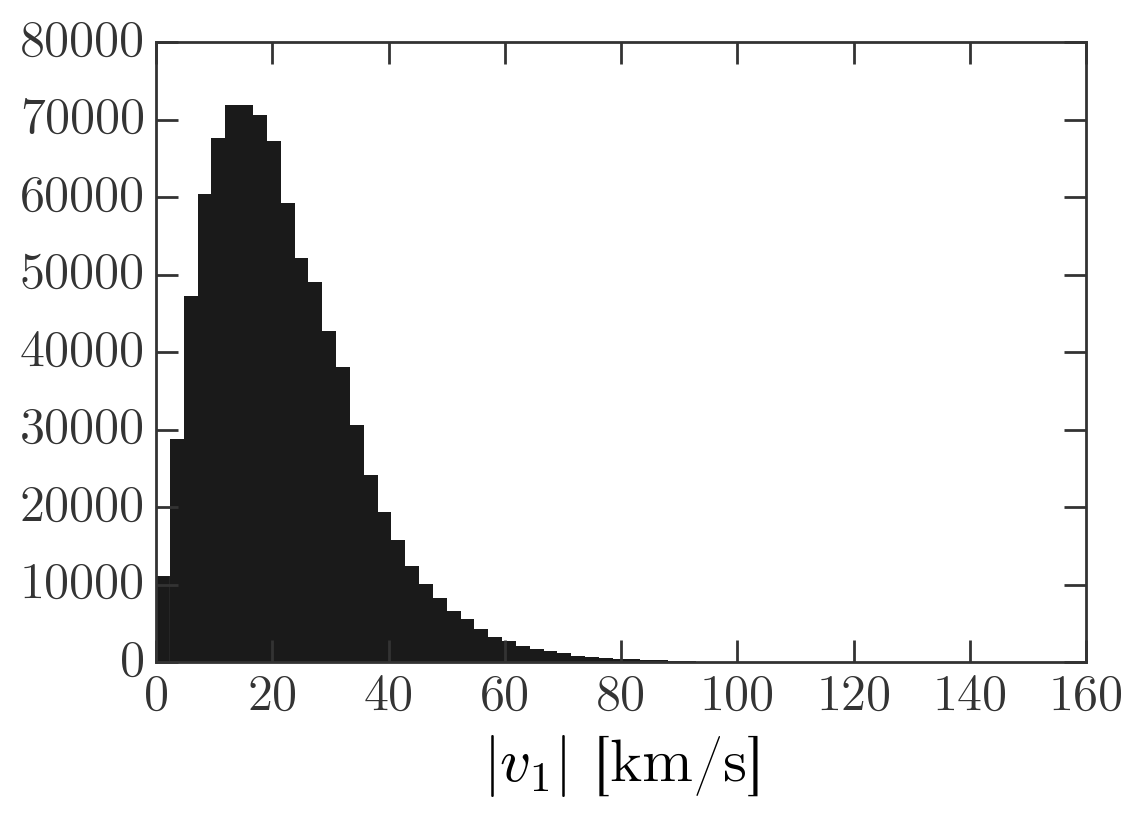

In [32]:
plt.hist(vtan1, bins=np.linspace(0, 150, 64));
plt.xlabel('$|v_1|$ [km/s]')

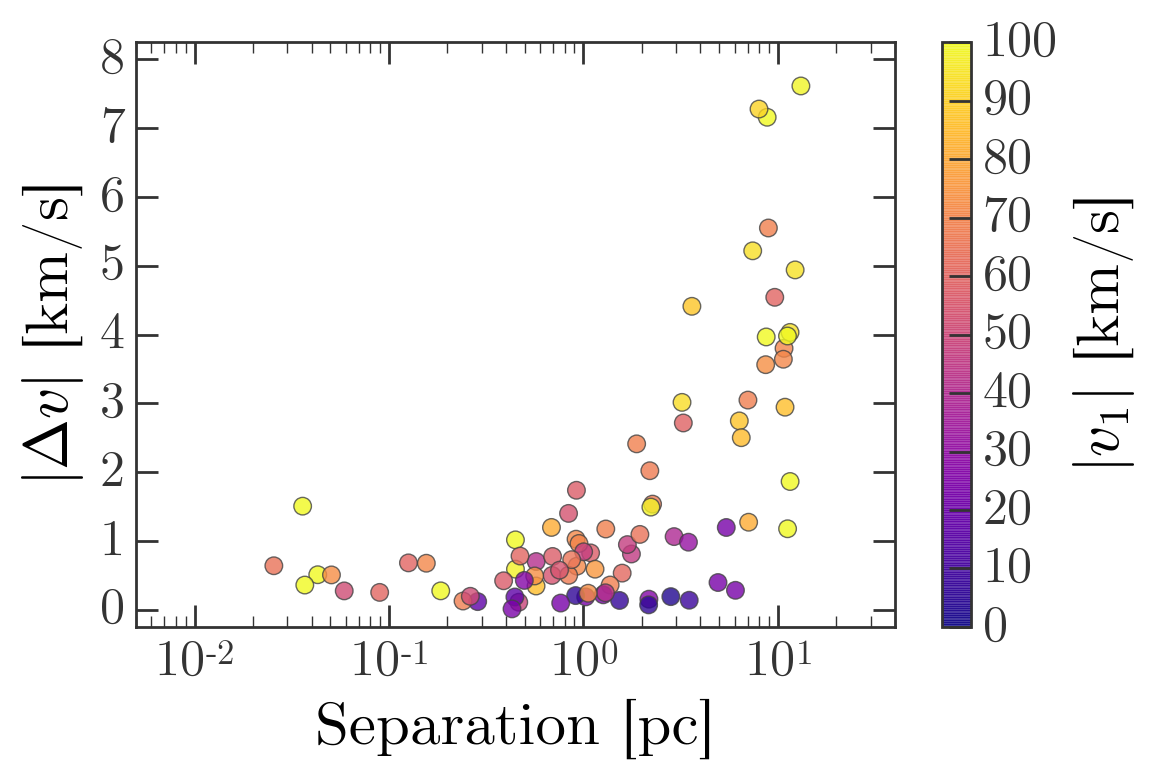

In [36]:
fig,ax = plt.subplots(1, 1, figsize=(6,4), sharex=True, sharey=True)

style = dict(alpha=0.8, marker='o', s=40, linewidths=0.5, edgecolors='#444444',
             vmin=0, vmax=100, cmap='plasma')

xmin = 5E-3
ax.set_xscale('log')
ax.set_xlim(xmin, 40)
ax.set_ylim(-0.25, 8.25)

cut = eval(snr_cut_str) & eval(llr_cut_str)
derp = ax.scatter(sep.to(u.pc).value[cut], dvtan.to(u.km/u.s).value[cut], 
                  c=vtan1[cut],  **style)

ax.set_xlabel('Separation [pc]')
ax.set_ylabel(r'$|\Delta v|$ [km/s]')

cb = fig.colorbar(derp)
cb.set_label('$|v_1|$ [km/s]')

fig.tight_layout()

In [48]:
outliers1 = tgas1[((dvtan.value  > 5) & (llr > 10) & (min_snr > 32))]
outliers2 = tgas2[((dvtan.value  > 5) & (llr > 10) & (min_snr > 32))]

outliers1._data['source_id'], outliers2._data['source_id']

(array([4783806454858007552, 5983336188648664704]),
 array([4798007575243563264, 5988665246628265856]))

In [55]:
from astropy.table import Table

In [66]:
min_llr = 9
llr_cut = llr > min_llr
llr_cut.sum()

608

In [67]:
_tbl = Table(tbl[llr_cut])

In [68]:
_tbl['llr'] = llr[llr_cut]

In [71]:
_tbl1 = tgas1[llr_cut]
_tbl2 = tgas2[llr_cut]
for name in ['ra', 'dec', 'parallax', 'pmra', 'pmdec']:
    _tbl['{}1'.format(name)] = _tbl1._data[name]
    _tbl['{}2'.format(name)] = _tbl2._data[name]

In [74]:
_tbl.write("../data/test-llr{}.fits".format(min_llr), overwrite=True)